Évaluation des résultats de lemmatisation 
==================================

## Objectifs

1. Lecture des logs
2. Alignement avec types de modèles
3. Lectures des résultats

## Data acquisition

In [65]:
import glob

# IMPORTANT: THIS IS HARD CODED, SUPPORT FOR ALL LEMMA FROM DEV SET

nb_words_dev_set = 40812


ModelScheme = {
    "config": "",
    "tar": "",
}
file = "./logs/single-tasks-no-vulgate.log"

def parse_lines(lines, task_prefix="## ", is_file=True):
    models = []
    tasks = []
    config = None
    current_task = None
    current = {
        "scores": {},
        "eval-time": []
    }
    for line in lines:
        if is_file and line.startswith("config_path: "):
            current["config"] = line.strip()[len("config_path: "):]
        elif is_file and "Bye" in line.strip():
            models.append(current)
            current = {
                "scores": {},
                "eval-time": []
            }
            current_task = None
        elif line.startswith(task_prefix):
            current_task = line.strip()[len(task_prefix):]
            tasks.append(current_task)
            current["scores"][current_task] = {}
            current["task"] = current_task
        elif current_task and line.startswith("|"):  # We already have a task recorded
            cat, acc, pre, rec, sup = [x.strip() for x in line.strip().split("|") if x]
            if sup == "support" or "---" in sup:
                continue
            current["scores"][current_task][cat] = (float(acc)*100, float(pre)*100, float(rec)*100, int(sup))
        elif is_file and ".tar" in line:
            current["file"] = line.strip()[len("Saved best model to: ["):-1]
        #elif is_file and "Finished training in " in line:
        #    current["training-time"] = float(line.strip()[len("2020-04-23 23:13:33,251 : Finished training in ["):-1])
        #elif is_file and "Starting epoch" in line:
        #    current["nb-epochs"] = int(line.strip()[len("2020-04-23 20:23:00,051 : Starting epoch ["):-1])
        #elif is_file and "Evaluation time: " in line:
        #    current["eval-time"].append(
        #        float(line.strip()[len("2020-04-24 04:04:56,425 : Evaluation time: "):-len(" sec")])
        #    )
    if not is_file:
        current["file"] = f"default-{len(models)}"
        models.append(current)
    models = {
        model.get("file", "default"): model for model in models
    }
    tasks = {
        task: [model for model in models.values() if model["task"] == task]
        for task in tasks
    }
    return models, tasks

with open(file) as f:
    models, tasks = parse_lines(f)


## Reference score

In [66]:
REF_NO_NOMPRO = """#### lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9734   | 0.8216    | 0.8196 | 169822  |
| known-tokens     | 0.9785   | 0.907     | 0.907  | 161674  |
| unknown-tokens   | 0.8716   | 0.7172    | 0.7153 | 8148    |
| ambiguous-tokens | 0.9292   | 0.7114    | 0.7171 | 41561   |
| unknown-targets  | 0.4775   | 0.3136    | 0.3115 | 1131    |


#### pos

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9651   | 0.8794    | 0.8669 | 169822  |
| known-tokens     | 0.9672   | 0.8808    | 0.8703 | 161674  |
| unknown-tokens   | 0.9232   | 0.6979    | 0.6511 | 8148    |
| ambiguous-tokens | 0.91     | 0.8234    | 0.784  | 52129   |


#### Gend

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.965    | 0.9166    | 0.9203 | 169822  |
| known-tokens     | 0.9673   | 0.9198    | 0.9248 | 161674  |
| unknown-tokens   | 0.9201   | 0.8673    | 0.8543 | 8148    |
| ambiguous-tokens | 0.868    | 0.8652    | 0.8747 | 34690   |


#### Numb

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9719   | 0.9705    | 0.9697 | 169822  |
| known-tokens     | 0.9731   | 0.9716    | 0.9705 | 161674  |
| unknown-tokens   | 0.9482   | 0.9224    | 0.9358 | 8148    |
| ambiguous-tokens | 0.9042   | 0.9013    | 0.8979 | 38122   |


#### Case

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9219   | 0.8811    | 0.8177 | 169822  |
| known-tokens     | 0.9244   | 0.8865    | 0.8237 | 161674  |
| unknown-tokens   | 0.8719   | 0.6896    | 0.6738 | 8148    |
| ambiguous-tokens | 0.8296   | 0.8196    | 0.7667 | 63352   |


#### Deg

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9813   | 0.9694    | 0.971  | 169822  |
| known-tokens     | 0.9832   | 0.9711    | 0.9746 | 161674  |
| unknown-tokens   | 0.9434   | 0.9345    | 0.9149 | 8148    |
| ambiguous-tokens | 0.9186   | 0.906     | 0.9258 | 27870   |


#### Mood_Tense_Voice

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9831   | 0.7845    | 0.7355 | 169822  |
| known-tokens     | 0.9868   | 0.8039    | 0.7632 | 161674  |
| unknown-tokens   | 0.91     | 0.6172    | 0.5863 | 8148    |
| ambiguous-tokens | 0.924    | 0.6879    | 0.675  | 16963   |


#### Person

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9971   | 0.9875    | 0.9772 | 169822  |
| known-tokens     | 0.9978   | 0.989     | 0.9814 | 161674  |
| unknown-tokens   | 0.9834   | 0.9762    | 0.9536 | 8148    |
| ambiguous-tokens | 0.9768   | 0.9391    | 0.9068 | 10040   |


#### Dis

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9727   | 0.879     | 0.8797 | 169822  |
| known-tokens     | 0.9738   | 0.8803    | 0.8823 | 161674  |
| unknown-tokens   | 0.9519   | 0.6651    | 0.5761 | 8148    |
| ambiguous-tokens | 0.912    | 0.8603    | 0.8649 | 41821   |
""".split("\n")

REF = """
## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.972    | 0.82      | 0.8138 | 169819  |
| known-tokens     | 0.9768   | 0.8901    | 0.8878 | 161865  |
| unknown-tokens   | 0.8736   | 0.7299    | 0.7254 | 7954    |
| ambiguous-tokens | 0.9264   | 0.6885    | 0.6953 | 42700   |
| unknown-targets  | 0.6304   | 0.464     | 0.4619 | 1104    |


## pos

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9611   | 0.938     | 0.9271 | 169819  |
| known-tokens     | 0.9641   | 0.9462    | 0.9312 | 161865  |
| unknown-tokens   | 0.9017   | 0.6995    | 0.6657 | 7954    |
| ambiguous-tokens | 0.9031   | 0.8792    | 0.8432 | 52025   |


## Gend

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9631   | 0.9107    | 0.9138 | 169819  |
| known-tokens     | 0.9656   | 0.9145    | 0.9192 | 161865  |
| unknown-tokens   | 0.9125   | 0.8507    | 0.8357 | 7954    |
| ambiguous-tokens | 0.8796   | 0.8799    | 0.8891 | 40191   |


## Numb

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9718   | 0.9702    | 0.9698 | 169819  |
| known-tokens     | 0.9734   | 0.9717    | 0.9712 | 161865  |
| unknown-tokens   | 0.9395   | 0.9094    | 0.9196 | 7954    |
| ambiguous-tokens | 0.9086   | 0.9051    | 0.9019 | 39600   |


## Case

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9219   | 0.8863    | 0.8198 | 169819  |
| known-tokens     | 0.9243   | 0.8919    | 0.8262 | 161865  |
| unknown-tokens   | 0.8726   | 0.6355    | 0.6256 | 7954    |
| ambiguous-tokens | 0.8318   | 0.8454    | 0.7857 | 64272   |


## Deg

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9799   | 0.968     | 0.9703 | 169819  |
| known-tokens     | 0.9822   | 0.9702    | 0.9751 | 161865  |
| unknown-tokens   | 0.933    | 0.9246    | 0.8993 | 7954    |
| ambiguous-tokens | 0.9197   | 0.9188    | 0.9332 | 29785   |


## Mood_Tense_Voice

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9822   | 0.7717    | 0.6944 | 169819  |
| known-tokens     | 0.9857   | 0.7829    | 0.711  | 161865  |
| unknown-tokens   | 0.911    | 0.6222    | 0.5942 | 7954    |
| ambiguous-tokens | 0.9222   | 0.6828    | 0.6701 | 17876   |


## Person

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9971   | 0.9879    | 0.9768 | 169819  |
| known-tokens     | 0.9979   | 0.9893    | 0.9822 | 161865  |
| unknown-tokens   | 0.9821   | 0.976     | 0.9461 | 7954    |
| ambiguous-tokens | 0.9788   | 0.9416    | 0.9223 | 10188   |


## Dis

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9716   | 0.8677    | 0.8749 | 169819  |
| known-tokens     | 0.973    | 0.8691    | 0.8783 | 161865  |
| unknown-tokens   | 0.9439   | 0.6508    | 0.5098 | 7954    |
| ambiguous-tokens | 0.9126   | 0.8507    | 0.8618 | 43148   |

""".split("\n")

ref, ref_tasks = parse_lines(REF_NO_NOMPRO, "#### ", is_file=False)

## Tabulate data

In [67]:
column = [
    "file", "task", 
    "acc", "pre", "rec",
    "acc-amb", "acc-unk-tok",
    "All support", "amb-tar-support", "Unk-toks-support", 
    #"training-time", 
    #"nb-epochs", 
    #"Sec / Epoch",
    #"Average Dev Test Time",
    #"sec / 1000 words"
]

files = sorted(list(models.keys()))

table = []
for task, files in tasks.items():
    for model in files:
        table.append([
            model["file"],
            task,
            # Accuracies
            model["scores"][task]["all"][0],
            model["scores"][task]["all"][1],
            model["scores"][task]["all"][2],
            model["scores"][task]["ambiguous-tokens"][0],
            model["scores"][task]["unknown-tokens"][0]
        ])
    
table = sorted(table, key=lambda x: f"{x[1]}.{x[2]*100:.2f}")  # 2 is acc, 3 amb, 5 tokens
table = [column] + table

In [68]:
# Create a table like representation
import tabulate
from IPython.display import HTML, display

display(HTML(tabulate.tabulate(table, floatfmt=".2f", tablefmt='html')))

file,task,acc,pre,rec,acc-amb,acc-unk-tok,All support,amb-tar-support,Unk-toks-support
./models/latin-upc-single-Case-Case-2021_02_23-22_00_19.tar,Case,94.17,89.94,87.11,87.7,89.08,,,
./models/latin-upc-single-Case-Case-2021_02_23-18_07_57.tar,Case,94.21000000000001,91.03,86.00999999999999,87.62,89.53,,,
./models/latin-upc-single-Case-Case-2021_02_24-12_34_35.tar,Case,94.32000000000001,90.88000000000001,87.24,87.83,89.45,,,
./models/latin-upc-single-Case-Case-2021_02_25-02_32_32.tar,Case,94.34,89.60000000000001,88.03,88.03999999999999,89.35,,,
./models/latin-upc-single-Case-Case-2021_02_25-07_00_16.tar,Case,94.44,89.32,88.49000000000001,88.16000000000001,89.45,,,
./models/latin-upc-single-Case-Case-2021_02_24-07_41_50.tar,Case,94.49,90.14,87.97,88.3,89.13,,,
./models/latin-upc-single-Case-Case-2021_02_24-02_50_30.tar,Case,94.5,89.99000000000001,88.56,88.2,89.52,,,
./models/latin-upc-single-Case-Case-2021_02_24-17_13_55.tar,Case,94.51,91.3,86.96000000000001,88.24,89.9,,,
./models/latin-upc-single-Case-Case-2021_02_25-11_42_36.tar,Case,94.6,91.47999999999999,87.67,88.38000000000001,89.53999999999999,,,
./models/latin-upc-single-Case-Case-2021_02_24-21_54_21.tar,Case,94.62,91.34,87.75,88.32,90.07,,,


In [69]:
with open("3 - Optimisation des Modeles - Entrainement comme tache unique - No Vulgate.csv", "w") as f:
    import csv
    writer = csv.writer(f)
    writer.writerows(table)

# Evaluating against current best-model

In [70]:
ref_score = {
    task: (
        model["scores"][task]["all"][0],
        model["scores"][task]["all"][1],
        model["scores"][task]["all"][2],
        model["scores"][task]["ambiguous-tokens"][0],
        model["scores"][task]["unknown-tokens"][0]
    )
    for model in ref.values()
    for task in model["scores"]
}

In [71]:
comparison_column = [
    "file", "task", 
    "acc", "pre", "rec",
    "acc-amb", "acc-unk-tok",
    "score"
    #"training-time", 
    #"nb-epochs", 
    #"Sec / Epoch",
    #"Average Dev Test Time",
    #"sec / 1000 words"
]

files = sorted(list(models.keys()))

comparison_table = []

for task, files in tasks.items():
    for model in files:
        comparison_table.append([
            model["file"].replace(f"./models/latin-upvc-single-{task}-", ""),
            task,
            # Accuracies
            float("{:.2f}".format(model["scores"][task]["all"][0]-ref_score[task][0])),
            float("{:.2f}".format(model["scores"][task]["all"][1]-ref_score[task][1])),
            float("{:.2f}".format(model["scores"][task]["all"][2]-ref_score[task][2])),
            float("{:.2f}".format(model["scores"][task]["ambiguous-tokens"][0]-ref_score[task][3])),
            float("{:.2f}".format(model["scores"][task]["unknown-tokens"][0]-ref_score[task][4]))
        ])
        comparison_table[-1].append(
            sum(comparison_table[-1][2:-1])
        )
    
comparison_table = sorted(comparison_table, key=lambda x: (x[1], x[-1]))  # 2 is acc, 3 amb, 5 tokens
comparison_table = [comparison_column] + comparison_table

display(HTML(tabulate.tabulate(comparison_table, floatfmt=":0,2f", tablefmt='html')))


file,task,acc,pre,rec,acc-amb,acc-unk-tok,score
./models/latin-upc-single-Case-Case-2021_02_23-18_07_57.tar,Case,2.02,2.92,4.24,4.66,2.34,13.84
./models/latin-upc-single-Case-Case-2021_02_23-22_00_19.tar,Case,1.98,1.83,5.34,4.74,1.89,13.89
./models/latin-upc-single-Case-Case-2021_02_25-02_32_32.tar,Case,2.15,1.49,6.26,5.08,2.16,14.979999999999999
./models/latin-upc-single-Case-Case-2021_02_24-12_34_35.tar,Case,2.13,2.77,5.47,4.87,2.26,15.240000000000002
./models/latin-upc-single-Case-Case-2021_02_25-07_00_16.tar,Case,2.25,1.21,6.72,5.2,2.26,15.379999999999999
./models/latin-upc-single-Case-Case-2021_02_24-07_41_50.tar,Case,2.3,2.03,6.2,5.34,1.94,15.870000000000001
./models/latin-upc-single-Case-Case-2021_02_24-17_13_55.tar,Case,2.32,3.19,5.19,5.28,2.71,15.98
./models/latin-upc-single-Case-Case-2021_02_24-02_50_30.tar,Case,2.31,1.88,6.79,5.24,2.33,16.22
./models/latin-upc-single-Case-Case-2021_02_24-21_54_21.tar,Case,2.43,3.23,5.98,5.36,2.88,17.0
./models/latin-upc-single-Case-Case-2021_02_25-11_42_36.tar,Case,2.41,3.37,5.9,5.42,2.35,17.1


# Evaluating (un)stability

<ipython-input-72-7bcebf9c8ac2>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


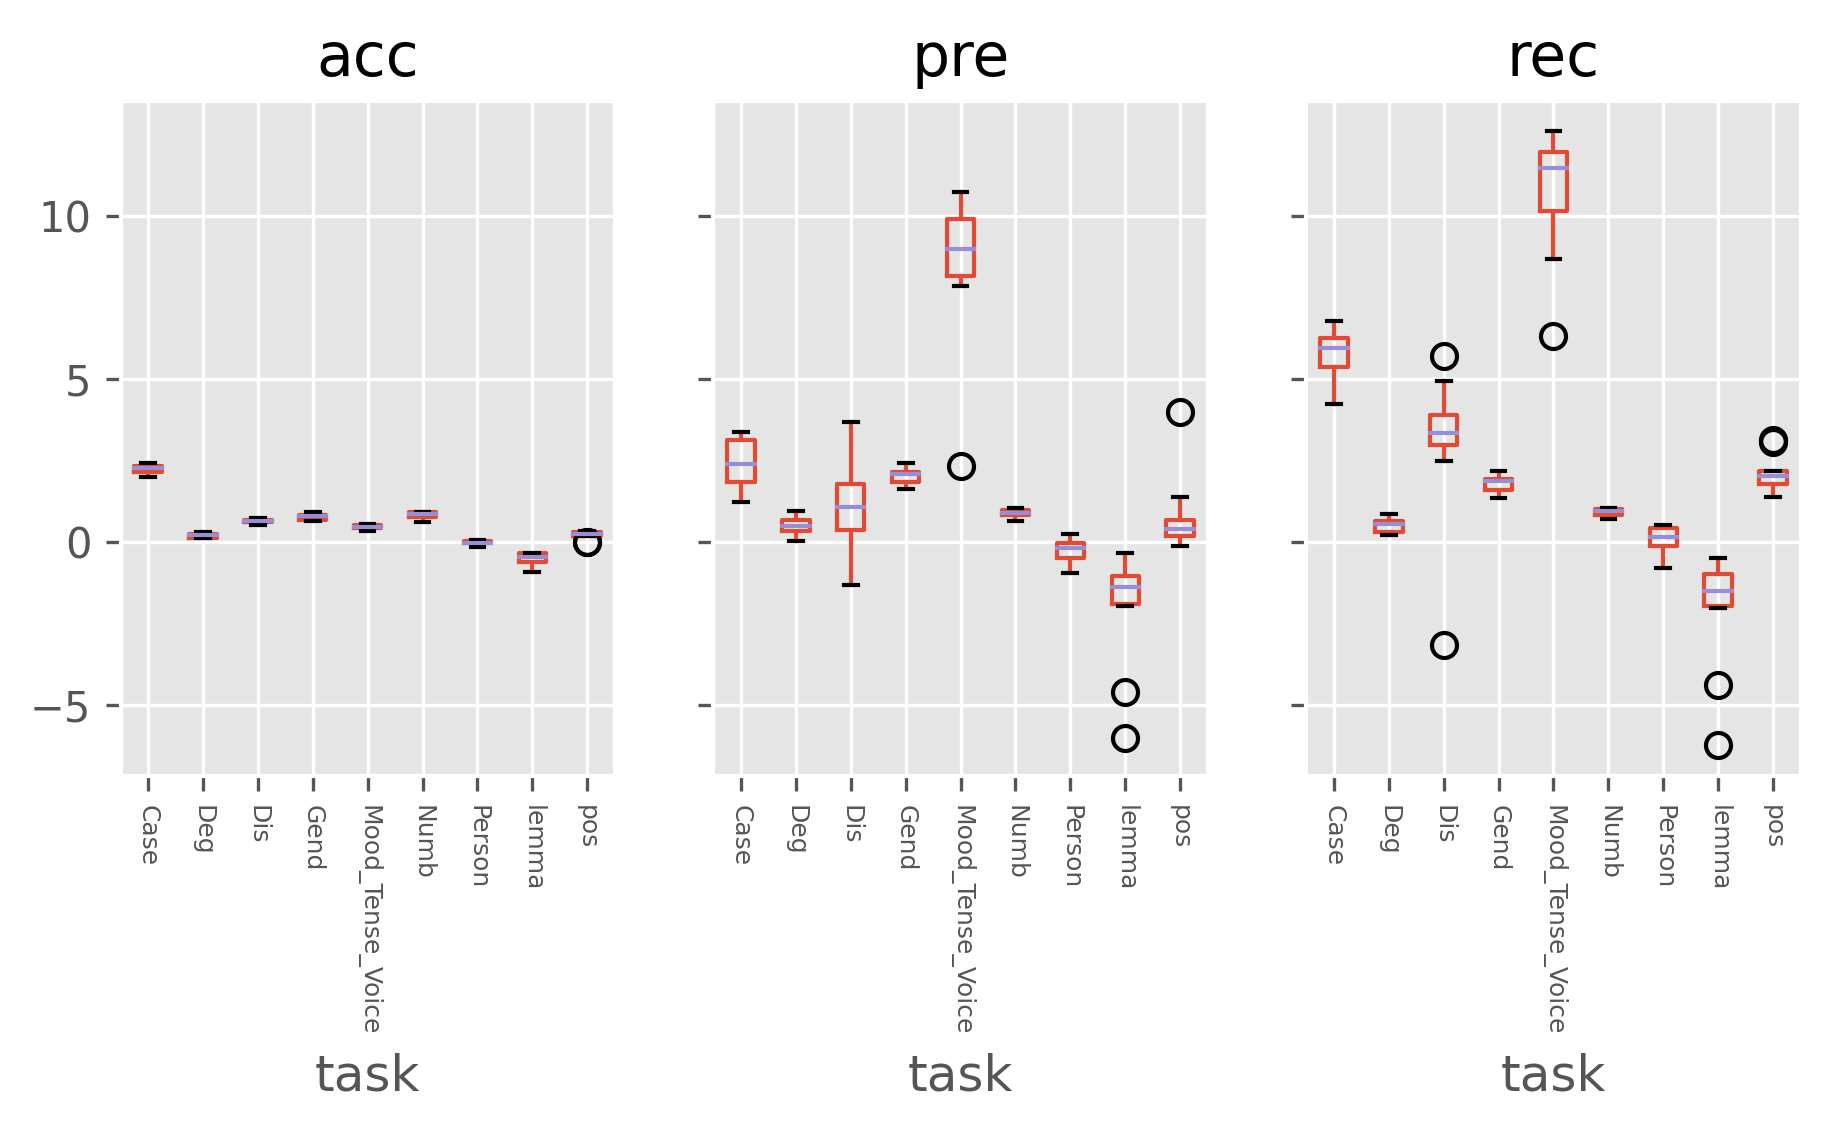

In [72]:
from pandas import DataFrame
import matplotlib.pyplot as plt

def simplify_title(row):
    """Simplify title into a simpler title"""
    # title = row[1]
    # title = title.split("/")[-1].replace(".json", "").replace("1.4.4.a-", "")
    # return [row[0], title] + row[2:]
    return row[1:]
    

models_std = DataFrame(
    [simplify_title(row) for row in comparison_table[1:]], 
    columns=comparison_table[0][1:]
)
models_std.sort_values(by="task")
#models_std.groupby("conf").std()#["acc"].plot()

plt.style.use('ggplot')
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,3), dpi=300, sharey=True)
models_std.boxplot(column="acc", by="task", ax=ax1, vert=True, rot=-90)
models_std.boxplot(column="pre", by="task", ax=ax2, vert=True, rot=-90)
models_std.boxplot(column="rec", by="task", ax=ax3, vert=True, rot=-90)
fig.suptitle("")
fig.show()

0.10790910799561719 0.09975525605756876
9


<ipython-input-73-0f1debdc366d>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


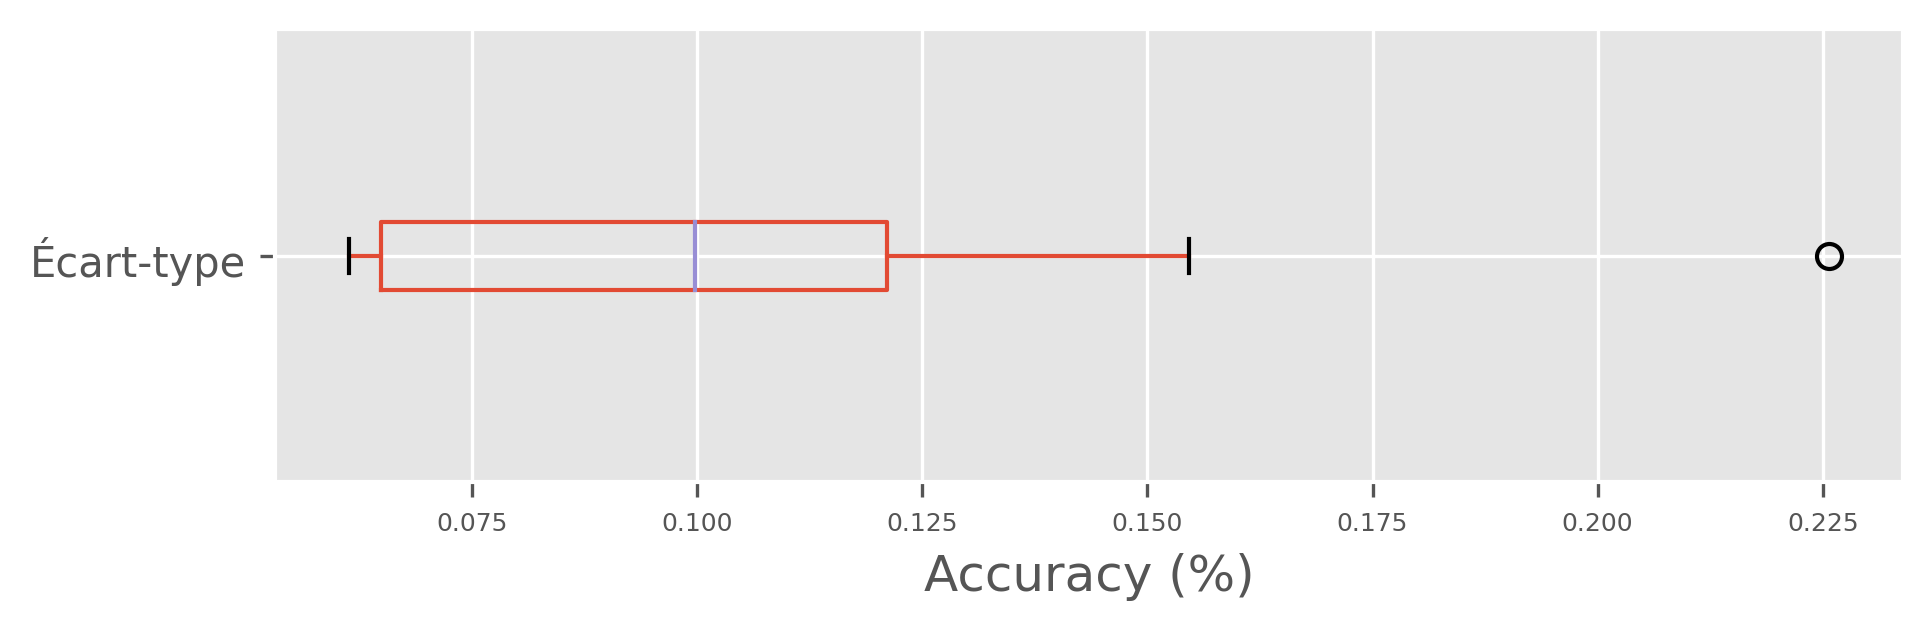

In [73]:
from pandas import Series

fig = plt.figure(figsize=(7,2), dpi=300)
ax = fig.gca()
serie = Series((models_std.groupby("task").acc.std()).tolist(), name="Écart-type")
ax = serie.plot.box(ax=ax, vert=False)#*100
ax.set_xlabel("Accuracy (%)")
fig.show()
print(serie.mean(), serie.median())
print(len(models_std.groupby("task")))

# Keeping the best model only

In [74]:
best = {
}

from collections import namedtuple

Infos = namedtuple("Infos", ["tar", "task", "acc", "pre", "rec", "amb", "score"])
for tar, task, acc, pre, rec, amb, *_, score in comparison_table[1:]:
    if task not in best or best[task].score < score:
        best[task] = Infos(tar, task, acc, pre, rec, amb, score)
    
column = [
    "file", "task", 
    "Accuracy", "Precision", "Recall", "Acc Ambiguous", "Score"
]
table2 = []
for task, values in best.items():
    table2.append(list(values))
    
table2 = sorted(table2, key=lambda x: x[0])  # 2 is acc, 3 amb, 4 tokens
table2 = [column] + table2

In [75]:
# Create a table like representation
import tabulate
from IPython.display import HTML, display

display(HTML(tabulate.tabulate(table2, tablefmt='html')))

for task_row in table2[1:]:
    print(f"mv ./models/latin-upvc-single-{task_row[1]}-{task_row[0]} bests/no-vulgate/{task_row[1]}.tar")

file,task,Accuracy,Precision,Recall,Acc Ambiguous,Score
./models/latin-upc-single-Case-Case-2021_02_25-11_42_36.tar,Case,2.41,3.37,5.9,5.42,17.1
./models/latin-upc-single-Deg-Deg-2021_02_24-08_09_38.tar,Deg,0.3,0.76,0.67,1.41,3.1399999999999997
./models/latin-upc-single-Dis-Dis-2021_02_24-18_11_34.tar,Dis,0.73,3.69,2.94,1.77,9.129999999999999
./models/latin-upc-single-Gend-Gend-2021_02_25-13_00_36.tar,Gend,0.93,2.3,2.19,3.6,9.02
./models/latin-upc-single-Mood_Tense_Voice-Mood_Tense_Voice-2021_02_25-14_48_35.tar,Mood_Tense_Voice,0.53,10.73,12.6,0.98,24.84
./models/latin-upc-single-Numb-Numb-2021_02_24-16_08_00.tar,Numb,0.92,0.95,1.05,3.24,6.16
./models/latin-upc-single-Person-Person-2021_02_24-11_29_26.tar,Person,0.05,0.24,0.5,0.61,1.4
./models/latin-upc-single-lemma-complexe-lemma-2021_02_24-15_06_46.tar,lemma,-0.33,-0.34,-0.51,-1.09,-2.2700000000000005
./models/latin-upc-single-pos-pos-2021_02_25-16_06_35.tar,pos,0.3,4.0,3.06,1.2,8.559999999999999


mv ./models/latin-upvc-single-Case-./models/latin-upc-single-Case-Case-2021_02_25-11_42_36.tar bests/no-vulgate/Case.tar
mv ./models/latin-upvc-single-Deg-./models/latin-upc-single-Deg-Deg-2021_02_24-08_09_38.tar bests/no-vulgate/Deg.tar
mv ./models/latin-upvc-single-Dis-./models/latin-upc-single-Dis-Dis-2021_02_24-18_11_34.tar bests/no-vulgate/Dis.tar
mv ./models/latin-upvc-single-Gend-./models/latin-upc-single-Gend-Gend-2021_02_25-13_00_36.tar bests/no-vulgate/Gend.tar
mv ./models/latin-upvc-single-Mood_Tense_Voice-./models/latin-upc-single-Mood_Tense_Voice-Mood_Tense_Voice-2021_02_25-14_48_35.tar bests/no-vulgate/Mood_Tense_Voice.tar
mv ./models/latin-upvc-single-Numb-./models/latin-upc-single-Numb-Numb-2021_02_24-16_08_00.tar bests/no-vulgate/Numb.tar
mv ./models/latin-upvc-single-Person-./models/latin-upc-single-Person-Person-2021_02_24-11_29_26.tar bests/no-vulgate/Person.tar
mv ./models/latin-upvc-single-lemma-./models/latin-upc-single-lemma-complexe-lemma-2021_02_24-15_06_46.ta

## Comparing Configurations

In [76]:
reformated = [[row[1]]+row[2:] for row in table2]
print(tabulate.tabulate([d[:-1] for d in reformated[1:]], headers=reformated[0][:-1], tablefmt='github'))

| task             |   Accuracy |   Precision |   Recall |   Acc Ambiguous |
|------------------|------------|-------------|----------|-----------------|
| Case             |       2.41 |        3.37 |     5.9  |            5.42 |
| Deg              |       0.3  |        0.76 |     0.67 |            1.41 |
| Dis              |       0.73 |        3.69 |     2.94 |            1.77 |
| Gend             |       0.93 |        2.3  |     2.19 |            3.6  |
| Mood_Tense_Voice |       0.53 |       10.73 |    12.6  |            0.98 |
| Numb             |       0.92 |        0.95 |     1.05 |            3.24 |
| Person           |       0.05 |        0.24 |     0.5  |            0.61 |
| lemma            |      -0.33 |       -0.34 |    -0.51 |           -1.09 |
| pos              |       0.3  |        4    |     3.06 |            1.2  |
